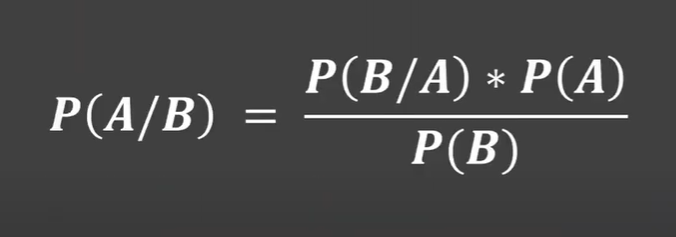

In [2]:
from IPython.display import Image
# We know that In probability theory and statistics, Bayes' theorem describes the probability of an event, 
# based on prior knowledge of conditions that might be related to the event.
Image("bayes.png")

In [1]:
# Consider Titanic Dataset. We have features like sex, class, fare, cabin, age, survived etc.

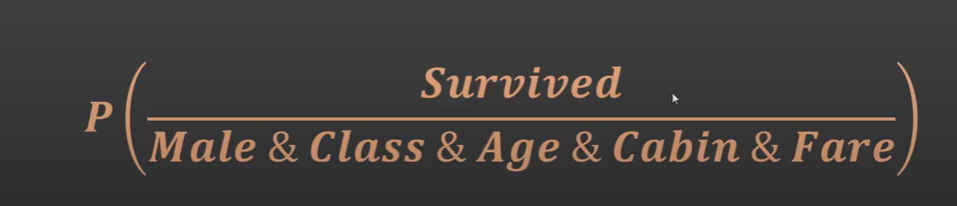

In [4]:
# We wanted to calculate the survival rate of the persons aboard on the Titanic ship, given that they are male and features
# like class, fare, cabin, age is given.
Image("a.png",width=500)

In [5]:
# The reason why we call Naive Bayes is that we make naive assumptions that any of the features doesnot depend on each other.
# But, actually features like Cabin and fare depend on each other. For simplicity, we assume that any of the features doesnot
# depend on each other. Hence, it is called Naive Bayes.

In [6]:
# Naive Bayes are used in Email spam,handwritten digits recognition, weather prediction, face detection,
# news article categorization.

# Naive Bayes Explaination:

In [8]:
# Consider that you are making a model which detects emails as spam and not spam. You collected emails that were divided
# as spam(25 emails) and not spam(75 emails). Consider a feature as:
# If the email contains a word 'buy' then it is spam. We look for the word 'buy' in our spam and not spam dataset and find that
# there were 20 emails in the spam dataset containing the word "buy" and 5 emails in the not spam dataset contained
# the word "buy". So there was a 80% chance that if the email contained the word "buy" it would be spam.
# Now we consider second feature:
# If the email contains a word 'cheap' then it is spam. We look for the word 'cheap' in our spam and not spam dataset
# and find that there were 15 emails in the spam dataset containing the word "cheap" and 10 emails in the
# not spam dataset contained the word "cheap". So there was a 60% chance that if the email contained the word "cheap"
# it would be spam.
# Now consider, we want to filter the emails such that the emails containing both the words "cheap" and "buy" are spam.
# We get 12 emails in the spam dataset containing both the words "cheap" and "buy" but in the not spam dataset, there was
# no email that contained both the words "cheap" and "buy". All the emails in the not spam dataset had either the word "cheap"
# or the word "buy". From this we can declare that if the email contained both the words "cheap" and "buy" then the probability
# of it being spam would be 100%. This may not be the correct way to calculate the probability because there may be chances
# that our dataset is too small to contain both the words "cheap" and "buy". So we can increase our dataset by collecting
# more information about the emails. Now consider that we cannot have more information because of some reason and we cannot
# deploy our model because of its probability of considering the emails containing both the words "cheap" and "buy" as a spam.

In [18]:
# So we make a naive assumption that suppose if the probability of email in the not spam containing the word "buy" is 5% and
# the probability of email in the not spam containing the word "cheap" is 10% then the probability of the email containing
# both the words "cheap" and "buy" should be 0.5%.

In [10]:
# We derived the 0.5% as:
# The probability of the email containing the word "cheap" is 10% which is a not spam email. The probability of the email
# containing the word "buy" is 5% which is a not spam email. Hence, the probability of the email containing both
# the words "cheap" and "buy" which is also a not spam email should be:
#    (5/100)*(10/100)=0.5%

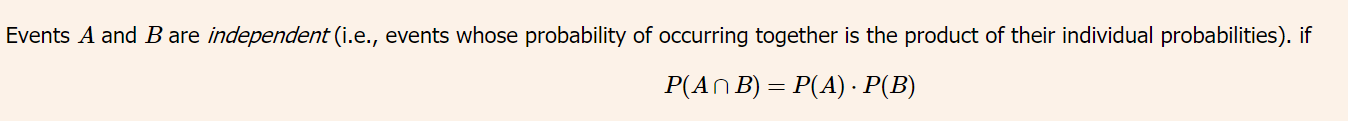

In [12]:
Image("independent_events.png", width=1000)

In [14]:
# So, we assume that 0.5% email of all the emails in the not spam contains both the words "cheap" and "buy".

In [15]:
# Since we assumed that our emails may contain both the words in the not spam,
# because the words "buy" and "cheap" (regardless of not being in our dataset) can be often used while
# selling a product, people may call it a naive assumption.

In [16]:
# This assumption doesnot effect our prediction from being diverted from the expected result and since it makes our maths
# a lot easier, we use Naive Bayes.

In [17]:
# You similarly repeat the assumption for emails that are spam.

In [19]:
# Now we solve the previous example where the spam emails containing the word "buy" was 4/5 and that of the word "cheap" was 3/5
# So the fraction of spam emails containg both words will be (3/5)*(4/5)=12/25. Since we had 25 emails in the spam dataset,
# the total number of spam emails containg both words will be (12/25)*25=12 emails.

In [20]:
# Similarly we do this for the not spam section. The fraction of not spam emails containing the word "buy" is 5/75=1/15
# and the fraction with the word "cheap" is (10/75)=2/15. Hence the fraction of not spam emails containing both words will be
# (1/15)*(2/15)=2/225. Since there are 75 not spam emails, the total no. of not spam emails containing both words will be
# (2/225)*75=2/3

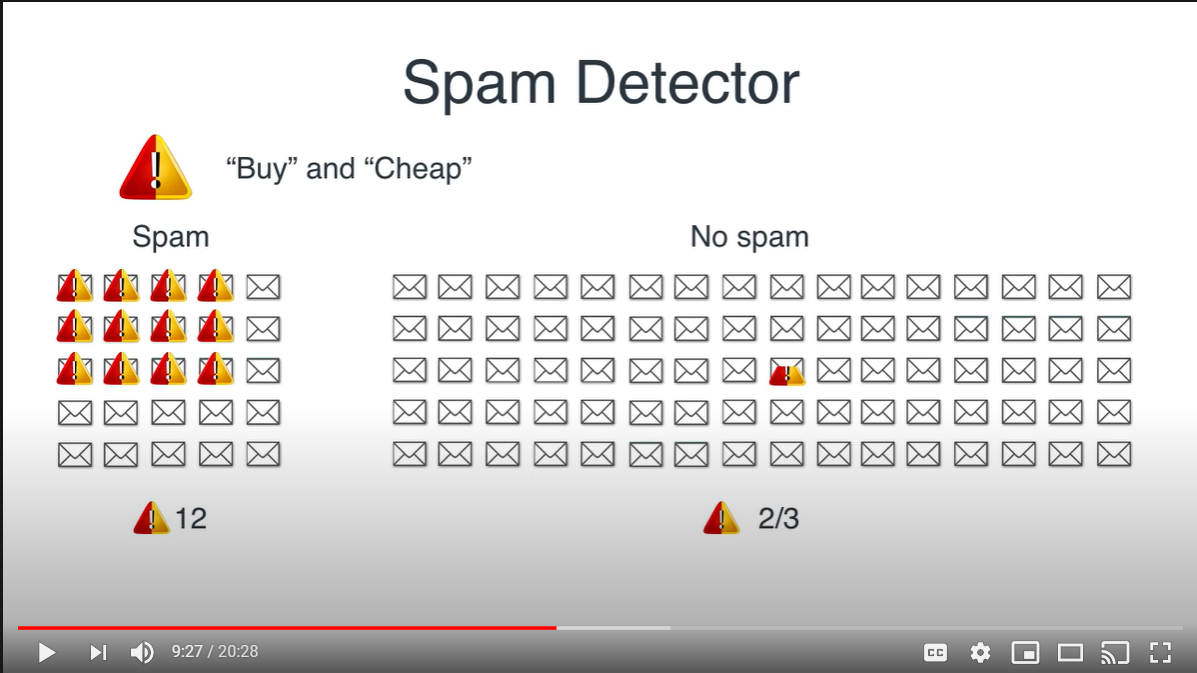

In [21]:
Image("b.png",width=700)

In [22]:
# Now we can calculate the probability of the emails that are spam containing both the words "cheap" and "buy:
# (12/(12+(2/3)))*100=94.74%

In [23]:
(12/(12+(2/3)))*100

94.73684210526316

In [24]:
# Naive Bayes Classifier does precisely the same as that of Naive Bayes theorem.

In [25]:
# You can repeat the assumption for "n" features.

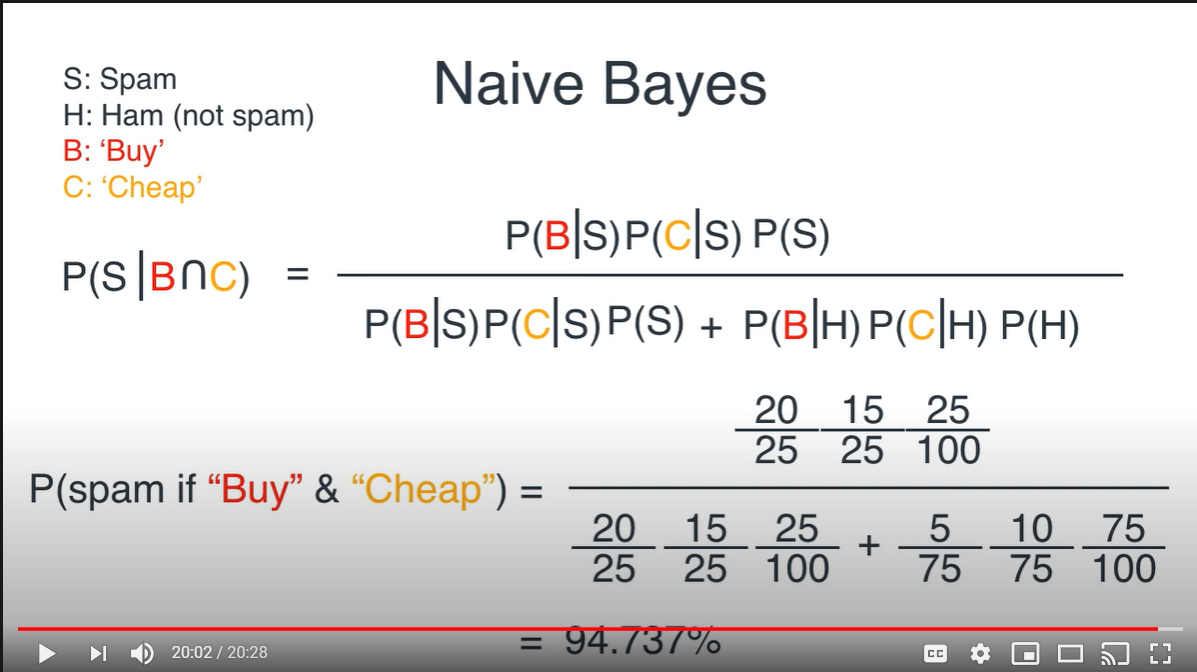

In [26]:
Image("naive_bayes.png",width=800)

# Practical:

In [143]:
# Naive Bayes is used to solve Classification problems.

In [29]:
import seaborn as sns
import pandas as pd

In [31]:
df=pd.read_csv("titanic.csv")
df.head()

PassengerId                                               Name  Pclass  \
0            1                            Braund, Mr. Owen Harris       3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2            3                             Heikkinen, Miss. Laina       3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4            5                           Allen, Mr. William Henry       3   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

In [32]:
# We are going to predict the survival rate.

In [33]:
# Data Exploration:

In [34]:
# We can see that name column doesnot have any impact on the survival rate. So, we are going to drop this column.

In [37]:
df.drop(columns="Name",inplace=True)

In [38]:
df

PassengerId  Pclass     Sex   Age  SibSp  Parch            Ticket  \
0              1       3    male  22.0      1      0         A/5 21171   
1              2       1  female  38.0      1      0          PC 17599   
2              3       3  female  26.0      0      0  STON/O2. 3101282   
3              4       1  female  35.0      1      0            113803   
4              5       3    male  35.0      0      0            373450   
..           ...     ...     ...   ...    ...    ...               ...   
886          887       2    male  27.0      0      0            211536   
887          888       1  female  19.0      0      0            112053   
888          889       3  female   NaN      1      2        W./C. 6607   
889          890       1    male  26.0      0      0            111369   
890          891       3    male  32.0      0      0            370376   

        Fare Cabin Embarked  Survived  
0     7.2500   NaN        S         0  
1    71.2833   C85        C         1  
2     7.9250   NaN        S         1  
3    53.1000  C123        S         1  
4     8.0500   NaN        S         0  
..       ...   ...      ...       ...  
886  13.0000   NaN        S         0  
887  30.0000   B42        S         1  
888  23.4500   NaN        S         0  
889  30.0000  C148        C         1  
890   7.7500   NaN        Q         0  

[891 rows x 11 columns]

In [40]:
df.drop(columns=["PassengerId","SibSp","Parch","Ticket","Cabin","Embarked"],inplace=True)

In [41]:
df

Pclass     Sex   Age     Fare  Survived
0         3    male  22.0   7.2500         0
1         1  female  38.0  71.2833         1
2         3  female  26.0   7.9250         1
3         1  female  35.0  53.1000         1
4         3    male  35.0   8.0500         0
..      ...     ...   ...      ...       ...
886       2    male  27.0  13.0000         0
887       1  female  19.0  30.0000         1
888       3  female   NaN  23.4500         0
889       1    male  26.0  30.0000         1
890       3    male  32.0   7.7500         0

[891 rows x 5 columns]

In [42]:
# Similarly we dropped the unnecessary columns.

In [48]:
# Lets split the target and features
features=df.drop(columns='Survived')
target=df['Survived']

In [49]:
features

Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
888       3  female   NaN  23.4500
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[891 rows x 4 columns]

In [45]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [50]:
# Now we convert the sex columns into dummy variables.

In [53]:
features=pd.get_dummies(features,drop_first=True)
features

Pclass   Age     Fare  Sex_male
0         3  22.0   7.2500         1
1         1  38.0  71.2833         0
2         3  26.0   7.9250         0
3         1  35.0  53.1000         0
4         3  35.0   8.0500         1
..      ...   ...      ...       ...
886       2  27.0  13.0000         1
887       1  19.0  30.0000         0
888       3   NaN  23.4500         0
889       1  26.0  30.0000         1
890       3  32.0   7.7500         1

[891 rows x 4 columns]

In [54]:
# Now lets see whether any column contains missing values

In [55]:
features.isnull().sum()

Pclass        0
Age         177
Fare          0
Sex_male      0
dtype: int64

In [56]:
# You can see that the Age column contains some missing values.

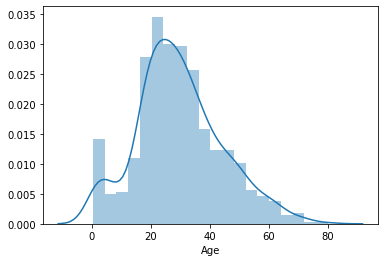

In [57]:
# Firstly lets check its distribution:
sns.distplot(features['Age'])

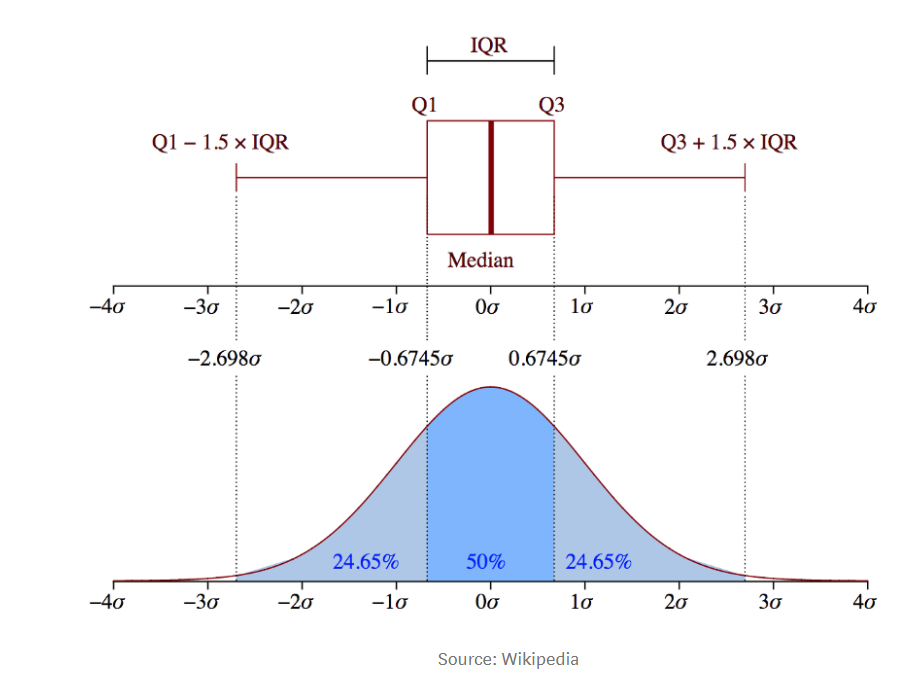

In [68]:
# You can observe that it follows bell curve. Generally, Age column of any dataset follows bell curve.
# We can see outliers in the data because of the bump at almost 10 years of age.
# https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a6234
Image("c.png")

In [ ]:
# We fill in the missing values with the mean of the ages.

In [69]:
# Since there are outliers, we are using median to fill in the missing values.

In [71]:
features['Age']=features['Age'].fillna(features['Age'].median())

In [72]:
features

Pclass   Age     Fare  Sex_male
0         3  22.0   7.2500         1
1         1  38.0  71.2833         0
2         3  26.0   7.9250         0
3         1  35.0  53.1000         0
4         3  35.0   8.0500         1
..      ...   ...      ...       ...
886       2  27.0  13.0000         1
887       1  19.0  30.0000         0
888       3  28.0  23.4500         0
889       1  26.0  30.0000         1
890       3  32.0   7.7500         1

[891 rows x 4 columns]

In [73]:
features.isnull().sum()

Pclass      0
Age         0
Fare        0
Sex_male    0
dtype: int64

In [74]:
features.head(6)

Pclass   Age     Fare  Sex_male
0       3  22.0   7.2500         1
1       1  38.0  71.2833         0
2       3  26.0   7.9250         0
3       1  35.0  53.1000         0
4       3  35.0   8.0500         1
5       3  28.0   8.4583         1

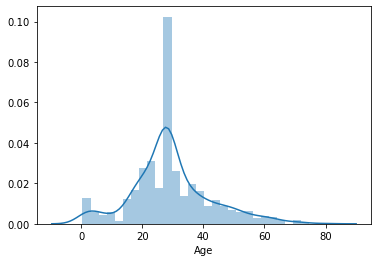

In [75]:
sns.distplot(features['Age'])

In [76]:
# Now you can see that the graph tends to become slightly symmetrical.

In [78]:
# Since we filled all the missing values values, we can split our data into training and testing set.
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [96]:
# Now we use Naive Bayes Algorithm:

In [97]:
# Since our data follows Gaussian Distribution to a certain extent we will be using GaussianNB (i.e., Gaussian Naive Bayes)

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
model=GaussianNB()

In [100]:
model.fit(X_train,y_train)

GaussianNB()

In [101]:
model.score(X_test,y_test)

0.8100558659217877

In [106]:
from sklearn.model_selection import cross_val_score

In [113]:
cross_val_score(GaussianNB(),X_train,y_train,cv=10)

array([0.77777778, 0.75      , 0.81690141, 0.77464789, 0.74647887,
       0.71830986, 0.83098592, 0.74647887, 0.76056338, 0.77464789])

In [114]:
cross_val_score(GaussianNB(),X_train,y_train).mean()

0.768226140057126

In [125]:
X_test

Pclass    Age     Fare  Sex_male
80        3  22.00   9.0000         1
681       1  27.00  76.7292         1
638       3  41.00  39.6875         0
741       1  36.00  78.8500         1
364       3  28.00  15.5000         1
..      ...    ...      ...       ...
468       3  28.00   7.7250         1
368       3  28.00   7.7500         0
840       3  20.00   7.9250         1
469       3   0.75  19.2583         0
574       3  16.00   8.0500         1

[179 rows x 4 columns]

In [134]:
model.predict(X_test.head(10))

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [138]:
y_test.head(10)

80     0
681    1
638    0
741    0
364    0
777    1
644    1
866    1
593    0
649    1
Name: Survived, dtype: int64

In [139]:
# You can see that 3 out of 10 predictions were right.

In [141]:
# You can also check the probaility of the values
model.predict_proba(X_test.head(10))

array([[0.95699482, 0.04300518],
       [0.37524124, 0.62475876],
       [0.37036778, 0.62963222],
       [0.37045924, 0.62954076],
       [0.9606276 , 0.0393724 ],
       [0.30033475, 0.69966525],
       [0.26757339, 0.73242661],
       [0.24454438, 0.75545562],
       [0.4153804 , 0.5846196 ],
       [0.39733763, 0.60266237]])

In [142]:
# This shows that the first element of the first row has a probability of 95% that he has not survived and 5% that he has 
# survived. Similarly with the other columns.